# About
* This explores the [FLORES+ dataset from Hugging Face](https://huggingface.co/datasets/openlanguagedata/flores_plus)
* We tokenize the dataset and get the fertility and parity scores
* We then visualize those scores 

# Imports

In [1]:
from transformers import AutoTokenizer
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

folder_path = '../../python_library'
sys.path.append(os.path.abspath(folder_path))
from token_scoring import *

In [2]:
# Load FLORES+ 
flores_plus_dev = load_dataset("openlanguagedata/flores_plus", split='dev').to_pandas()

Resolving data files:   0%|          | 0/218 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/213 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/218 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/213 [00:00<?, ?it/s]

# Get Fertility and Parity

In [3]:
flores_plus_dev = flores_plus_dev.rename(columns={'iso_15924':'language'})
print(flores_plus_dev.shape)
flores_plus_dev.head(2)

(217346, 11)


,id,iso_639_3,language,glottocode,text,url,domain,topic,has_image,has_hyperlink,last_updated
0,0,ace,Arab,achi1257,يق أورو سنين، اوق علمون دري فکولتس کدوکترن يون...,https://en.wikinews.org/wiki/Scientists_say_ne...,wikinews,health,yes,yes,1.0
1,1,ace,Arab,achi1257,ڤنليتي اوتام خن اترا ڽو موڠکين محسى ديتيکسي فو...,https://en.wikinews.org/wiki/Scientists_say_ne...,wikinews,health,yes,yes,1.0


In [4]:
# Get unique languages
print(f"There are {len(flores_plus_dev['language'].unique())} in the FLORES+ dataset:")
print(flores_plus_dev['language'].unique())

models = ["google/flan-t5-xxl",
          "bigscience/mt0-xxl-mt",
          "CohereForAI/aya-101",
          "bigscience/bloomz-7b1",
          "microsoft/Phi-3.5-mini-instruct",
          "neulab/Pangea-7B",
          "google/gemma-7b",
          "google/gemma-2-9b",
          "meta-llama/Llama-3.2-1B-Instruct"]
names_for_csv = ['flan-t5-xxl',
                 'mt0-xxl-mt',
                 'aya-101',
                 'bloomz-7b1',
                 'Phi-3.5-mini-instruct',
                 'Pangea-7B',
                 'gemma-7b',
                 'gemma-2-9b', 
                 'Llama-3.2-1B-Instruct']

There are 31 in the FLORES+ dataset:
['Arab' 'Latn' 'Ethi' 'Beng' 'Deva' 'Cyrl' 'Tibt' 'Hans' 'Hant' 'Grek'
 'Gujr' 'Hebr' 'Armn' 'Jpan' 'Knda' 'Geor' 'Khmr' 'Hang' 'Laoo' 'Mlym'
 'Mtei' 'Mymr' 'Nkoo' 'Orya' 'Guru' 'Olck' 'Sinh' 'Taml' 'Tfng' 'Telu'
 'Thai']


In [5]:
fertility_dfs = []
parity_dfs = []
for i in range(len(models)):
    scored_fertility = get_fertilities(data=flores_plus_dev, 
                                       tokenizer=AutoTokenizer.from_pretrained(models[i]), 
                                       visualize=False)
    scored_parity = get_parities(data=flores_plus_dev,
                                 tokenizer=AutoTokenizer.from_pretrained(models[i]),
                                 visualize=False)
    
    scored_fertility['model'] = models[i]
    scored_parity['model'] = models[i]

    fertility_dfs.append(scored_fertility)
    parity_dfs.append(scored_parity)

    print(f'Done with {models[i]}')

fertilities = pd.concat(fertility_dfs, ignore_index=True)
parities = pd.concat(parity_dfs, ignore_index=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (911368 > 512). Running this sequence through the model will result in indexing errors


Done with google/flan-t5-xxl
Done with bigscience/mt0-xxl-mt
Done with CohereForAI/aya-101
Done with bigscience/bloomz-7b1


Token indices sequence length is longer than the specified maximum sequence length for this model (2505498 > 131072). Running this sequence through the model will result in indexing errors


Done with microsoft/Phi-3.5-mini-instruct


Token indices sequence length is longer than the specified maximum sequence length for this model (1397776 > 8192). Running this sequence through the model will result in indexing errors


Done with neulab/Pangea-7B
Done with google/gemma-7b
Done with google/gemma-2-9b


Token indices sequence length is longer than the specified maximum sequence length for this model (1319075 > 131072). Running this sequence through the model will result in indexing errors


Done with meta-llama/Llama-3.2-1B-Instruct


In [6]:
fertilities.head(2)

,language,corpus,fertility,tokens,model
0,Arab,يق أورو سنين، اوق علمون دري فکولتس کدوکترن يون...,2.078433,"[▁, يق, ▁, أورو, ▁, سنين،, ▁, اوق, ▁, علمون, ▁...",google/flan-t5-xxl
1,Latn,"Bak uroe Senin, awak ilmuwan dari Fakultas Ked...",3.436214,"[▁Bak, ▁, ur, o, e, ▁Sen, in, ,, ▁, a, wak, ▁,...",google/flan-t5-xxl


In [7]:
parities.head(2)

,id,iso_639_3,language,glottocode,text,url,domain,topic,has_image,has_hyperlink,last_updated,parity,tokens,model
0,0,ace,Arab,achi1257,يق أورو سنين، اوق علمون دري فکولتس کدوکترن يون...,https://en.wikinews.org/wiki/Scientists_say_ne...,wikinews,health,yes,yes,1.0,2.155556,"[▁, يق, ▁, أورو, ▁, سنين،, ▁, اوق, ▁, علمون, ▁...",google/flan-t5-xxl
1,1,ace,Arab,achi1257,ڤنليتي اوتام خن اترا ڽو موڠکين محسى ديتيکسي فو...,https://en.wikinews.org/wiki/Scientists_say_ne...,wikinews,health,yes,yes,1.0,2.307692,"[▁, ڤنليتي, ▁, اوتام, ▁, خن, ▁, اترا, ▁, ڽو, ▁...",google/flan-t5-xxl


In [8]:
# Export dataframes to csv if desired

# parities.to_csv('model_parities_using_library.csv')
# fertilities.to_csv('model_fertilities_using_library.csv')

# Visualize Fertility

In [9]:
model_summaries = fertilities.groupby('model')['fertility'].describe()
model_summaries

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
CohereForAI/aya-101,31.0,6.329727,7.314511,2.104427,2.600421,3.012729,6.108890,30.143799
bigscience/bloomz-7b1,31.0,11.939275,12.950681,1.514487,2.258471,6.058881,16.073491,44.211665
bigscience/mt0-xxl-mt,31.0,6.329727,7.314511,2.104427,2.600421,3.012729,6.108890,30.143799
google/flan-t5-xxl,31.0,2.602669,1.048444,2.040513,2.090918,2.143660,2.222407,5.829346
google/gemma-2-9b,31.0,8.476900,7.593213,2.120740,3.635907,5.591380,9.177739,28.918156
google/gemma-7b,31.0,8.476900,7.593213,2.120740,3.635907,5.591380,9.177739,28.918156
meta-llama/Llama-3.2-1B-Instruct,31.0,16.422128,14.790794,2.402349,8.412023,12.358785,16.518693,72.014839
microsoft/Phi-3.5-mini-instruct,31.0,19.731495,16.967171,2.618073,8.457879,12.159142,25.789270,62.217310
neulab/Pangea-7B,31.0,13.045482,10.661878,2.400613,6.380682,9.187998,16.370472,48.148746


In [10]:
models = fertilities['model'].unique()
values = []
for model in models:
    subset = fertilities[fertilities['model']==model]
    values.append(np.array(subset['fertility']))

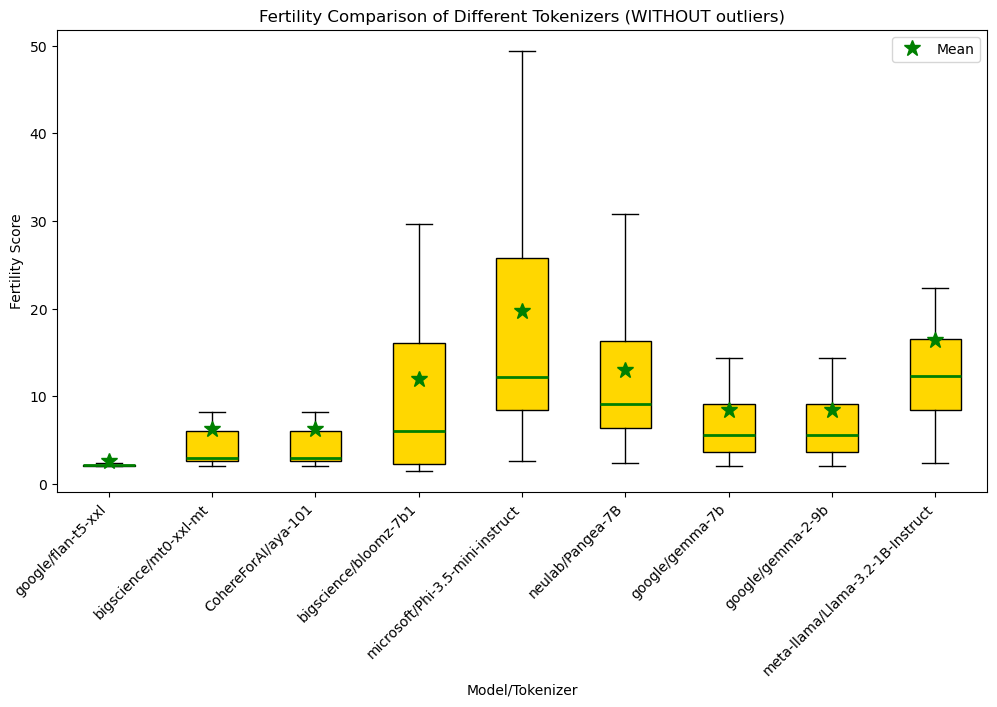

In [11]:
# WITHOUT Outliers
plt.figure(figsize=(12, 6))
boxprops = dict(facecolor='gold', color='black') 
medianprops = dict(color='green', linewidth=2)  

plt.boxplot(
    values,
    labels=models,
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    showfliers=False
)

for i, data in enumerate(values, start=1):
    mean = np.mean(data)
    plt.plot(i, mean, 'g*', markersize=12, label='Mean' if i == 1 else "")  
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Fertility Comparison of Different Tokenizers (WITHOUT outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Fertility Score')
plt.show()

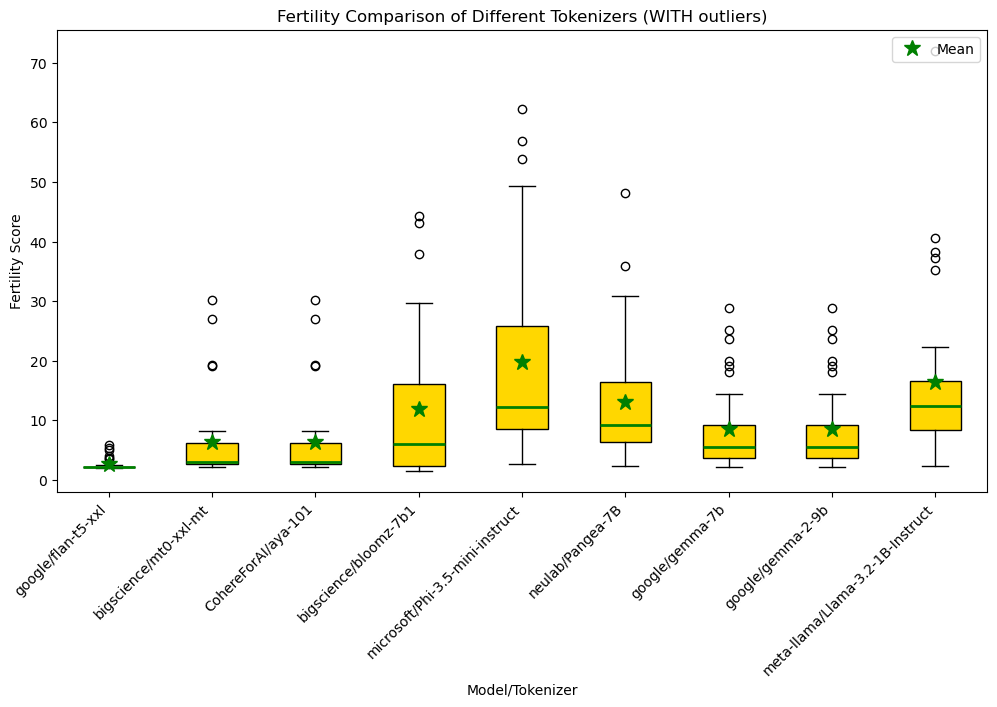

In [12]:
# WITH Outliers
plt.figure(figsize=(12, 6))

boxprops = dict(facecolor='gold', color='black') 
medianprops = dict(color='green', linewidth=2)  

plt.boxplot(
    values,
    labels=models,
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    showfliers=True
)

for i, data in enumerate(values, start=1):
    mean = np.mean(data)
    plt.plot(i, mean, 'g*', markersize=12, label='Mean' if i == 1 else "")  
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Fertility Comparison of Different Tokenizers (WITH outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Fertility Score')
plt.show()

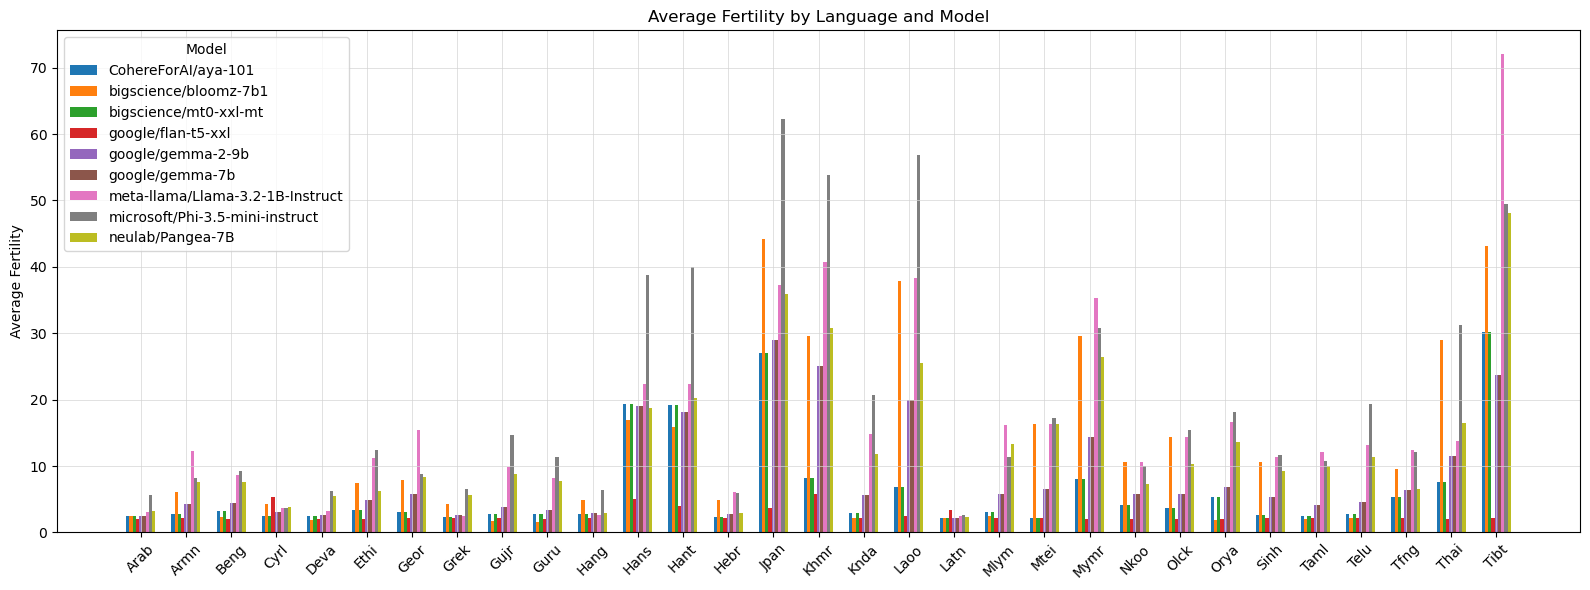

In [13]:
# Average Fertility by Language and Model
grouped_fertilities = fertilities.groupby(['language', 'model'], as_index=False)['fertility'].mean()
pivot_df = grouped_fertilities.pivot(index='language', columns='model', values='fertility')

fig, ax = plt.subplots(figsize=(16, 6))

bar_width = 2
languages = pivot_df.index
models = pivot_df.columns

x = np.arange(len(languages)) * (1 + 3 * len(models))  # Add space between languages 

for i, model in enumerate(models): # Create bars for each model
    ax.bar(x + i * bar_width, pivot_df[model], bar_width, label=model)

ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(languages)
ax.set_ylabel('Average Fertility')
ax.set_title('Average Fertility by Language and Model')
ax.legend(title='Model')
plt.xticks(rotation=45)
plt.grid(color='#d4d4d4', linewidth=0.5)
plt.tight_layout()
plt.show()

# Visualize Parity

In [14]:
model_summaries = parities.groupby('model')['parity'].describe()
model_summaries

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
CohereForAI/aya-101,217346.0,3.607339,7.323158,1.133333,2.000000,2.315789,2.820513,232.0
bigscience/bloomz-7b1,217346.0,4.897598,12.108745,1.000000,1.818182,2.300000,3.277778,342.0
bigscience/mt0-xxl-mt,217346.0,3.607404,7.323233,1.133333,2.000000,2.315789,2.821200,232.0
google/flan-t5-xxl,217346.0,3.299956,1.358301,1.000000,2.142857,3.058824,4.000000,52.0
google/gemma-2-9b,217346.0,3.969655,7.142656,1.000000,1.916667,2.384615,3.239130,197.0
google/gemma-7b,217346.0,3.969655,7.142656,1.000000,1.916667,2.384615,3.239130,197.0
meta-llama/Llama-3.2-1B-Instruct,217346.0,6.307627,17.344246,1.022222,2.166667,2.714286,3.818182,582.0
microsoft/Phi-3.5-mini-instruct,217346.0,7.496196,16.652923,1.038462,2.444444,3.260870,5.639722,466.0
neulab/Pangea-7B,217346.0,5.468944,11.834965,1.000000,2.214286,2.842105,4.315789,382.0


In [15]:
models = parities['model'].unique()
values = []
for model in models:
    subset = parities[parities['model']==model]
    values.append(np.array(subset['parity']))

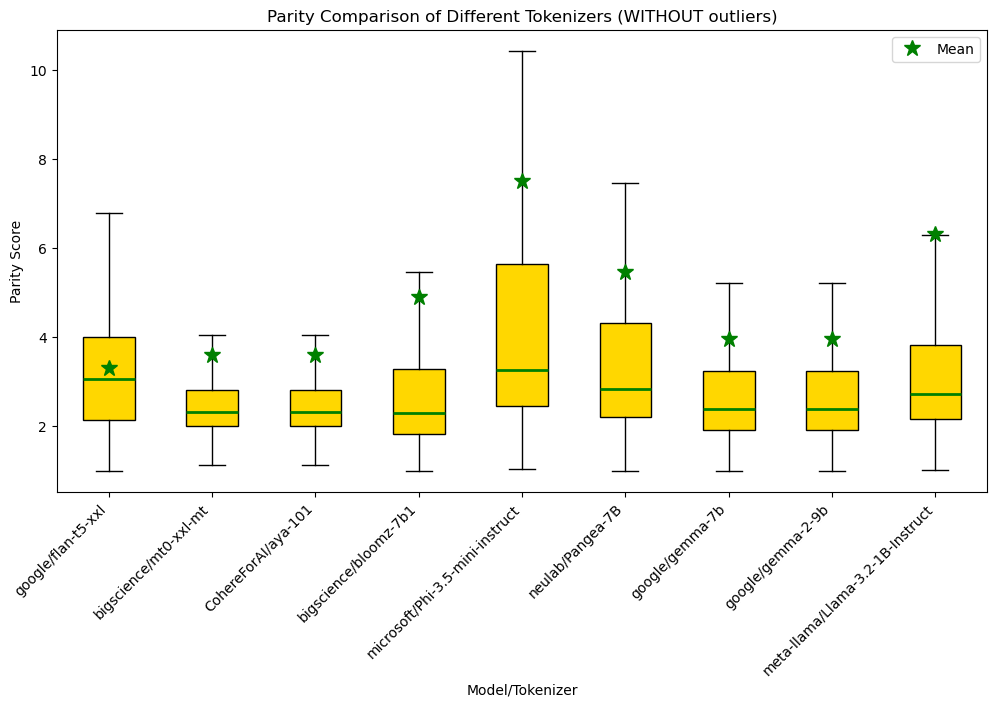

In [16]:
# WITHOUT Outliers
plt.figure(figsize=(12, 6))
boxprops = dict(facecolor='gold', color='black') 
medianprops = dict(color='green', linewidth=2)  

plt.boxplot(
    values,
    labels=models,
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    showfliers=False
)

for i, data in enumerate(values, start=1):
    mean = np.mean(data)
    plt.plot(i, mean, 'g*', markersize=12, label='Mean' if i == 1 else "")  
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Parity Comparison of Different Tokenizers (WITHOUT outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Parity Score')
plt.show()

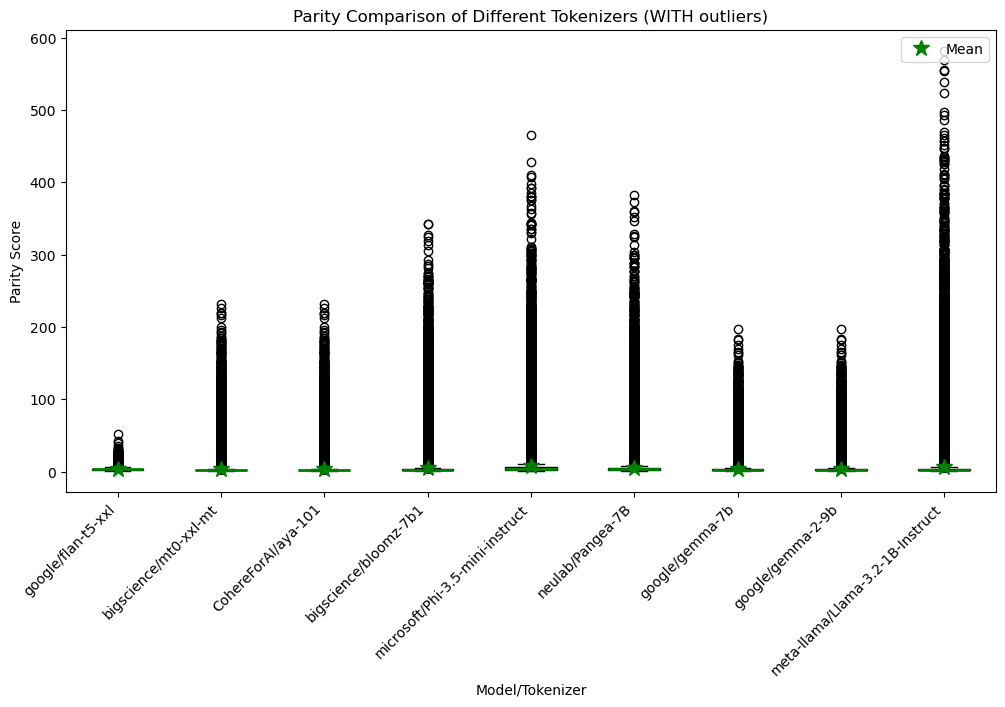

In [17]:
# WITH Outliers
plt.figure(figsize=(12, 6))

boxprops = dict(facecolor='gold', color='black') 
medianprops = dict(color='green', linewidth=2)  

plt.boxplot(
    values,
    labels=models,
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    showfliers=True
)

for i, data in enumerate(values, start=1):
    mean = np.mean(data)
    plt.plot(i, mean, 'g*', markersize=12, label='Mean' if i == 1 else "")  
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Parity Comparison of Different Tokenizers (WITH outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Parity Score')
plt.show()

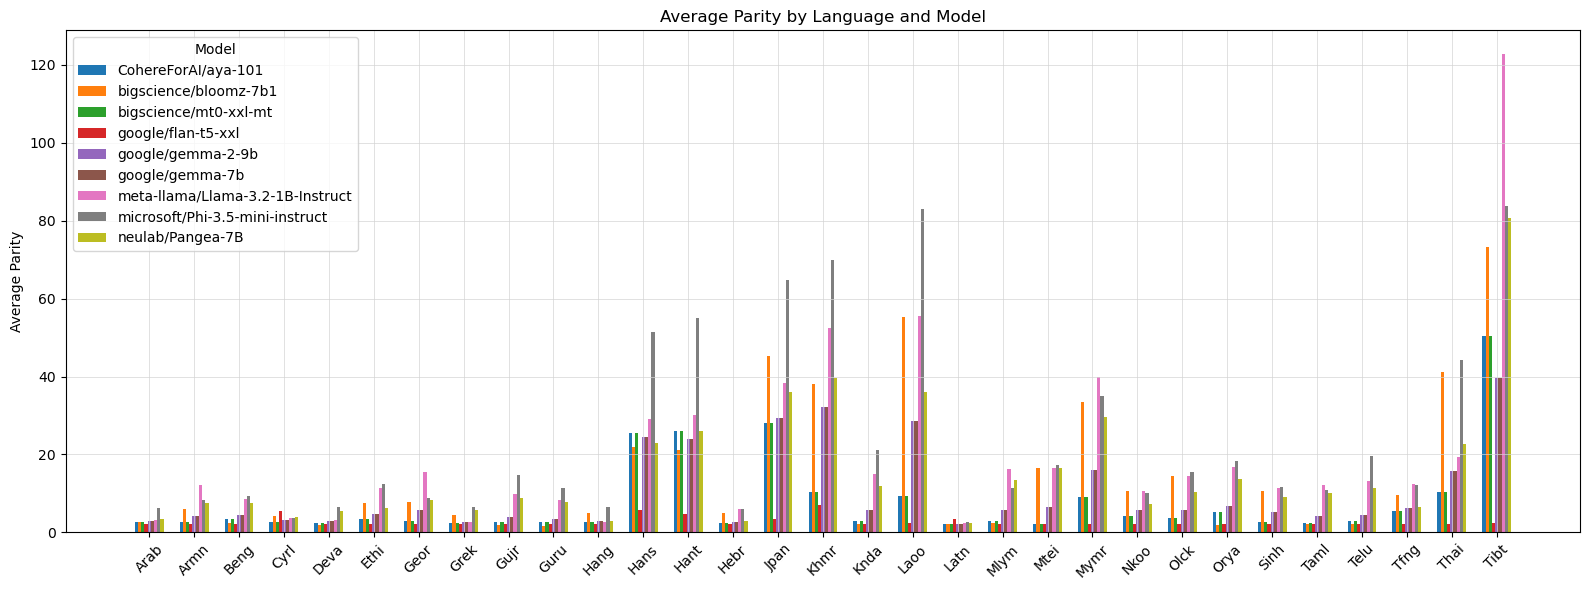

In [18]:
# Average Parities by Language and Model
grouped_parities = parities.groupby(['language', 'model'], as_index=False)['parity'].mean()
pivot_df = grouped_parities.pivot(index='language', columns='model', values='parity')

fig, ax = plt.subplots(figsize=(16, 6))

bar_width = 2
languages = pivot_df.index
models = pivot_df.columns

x = np.arange(len(languages)) * (1 + 3 * len(models))  # Add space between languages 

for i, model in enumerate(models): # Create bars for each model
    ax.bar(x + i * bar_width, pivot_df[model], bar_width, label=model)

ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(languages)
ax.set_ylabel('Average Parity')
ax.set_title('Average Parity by Language and Model')
ax.legend(title='Model')
plt.xticks(rotation=45)
plt.grid(color='#d4d4d4', linewidth=0.5)
plt.tight_layout()
plt.show()